In [1]:
# import necessray packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# load the dataframe
CK_data = pd.read_csv("CK_data_to_HCC.csv")

In [3]:
# glimpse of data
CK_data.head()

,SECTOR,Rep,Acronym,Ntreatment,NH3_Base_Rx,Rx_6_20,Rx_6_29,Rx_7_11,Obj__Id,Target_NRate,Applied_NRate,SI_6_15,SI_6_23,SI_7_6,SI_7_19,SI_8_3,SI_8_18,Yield
0,1,1,RAP-R4,SBF,30,30,60,60,587,165.0003,163.4566,1.023816,1.026000,0.993957,0.993957,0.889168,0.966771,232.0022
1,2,1,RAP-IR,Irrigated Spring NH3,165,165,165,165,561,140.0013,138.4943,1.028762,1.003950,0.902090,0.902090,1.013855,0.994462,223.6540
2,3,1,RAP,Irrigated Spring NH3,165,165,165,165,779,30.0041,148.5456,1.027272,1.021914,0.958456,1.035477,0.959885,1.004655,274.8740
3,4,2,RAP,SBF,30,60,60,30,781,138.0010,72.7658,1.010141,1.010998,0.933970,0.985974,0.951999,1.008160,248.4900
4,5,2,RAP-R4,SBF,30,60,60,30,368,165.0003,165.2911,0.990665,1.020321,0.985180,0.960276,1.010058,1.038533,264.7920


In [4]:
# obseravtions and variables?
CK_data.shape

(12, 18)

In [5]:
# variable types?
CK_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SECTOR         12 non-null     int64  
 1   Rep            12 non-null     int64  
 2   Acronym        12 non-null     object 
 3   Ntreatment     12 non-null     object 
 4   NH3_Base_Rx    12 non-null     int64  
 5   Rx_6_20        12 non-null     int64  
 6   Rx_6_29        12 non-null     int64  
 7   Rx_7_11        12 non-null     int64  
 8   Obj__Id        12 non-null     int64  
 9   Target_NRate   12 non-null     float64
 10  Applied_NRate  12 non-null     float64
 11  SI_6_15        12 non-null     float64
 12  SI_6_23        12 non-null     float64
 13  SI_7_6         12 non-null     float64
 14  SI_7_19        12 non-null     float64
 15  SI_8_3         12 non-null     float64
 16  SI_8_18        12 non-null     float64
 17  Yield          12 non-null     float64
dtypes: float64(9

In [6]:
# get infor about the numerical variables
CK_data.describe()

,SECTOR,Rep,NH3_Base_Rx,Rx_6_20,Rx_6_29,Rx_7_11,Obj__Id,Target_NRate,Applied_NRate,SI_6_15,SI_6_23,SI_7_6,SI_7_19,SI_8_3,SI_8_18,Yield
count,12.000000,12.000000,12.000000,12.00000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,2.500000,97.500000,105.00000,112.500000,105.00000,592.000000,111.313758,115.778450,0.997736,0.960217,0.889723,0.981716,0.964576,0.977378,242.970267
std,3.605551,1.167748,70.501451,63.63961,54.834462,63.63961,222.039718,57.760190,41.070954,0.037955,0.118137,0.147354,0.045890,0.062968,0.058909,23.228312
min,1.000000,1.000000,30.000000,30.00000,60.000000,30.00000,271.000000,30.004100,50.483900,0.931846,0.700851,0.516795,0.902090,0.851005,0.806084,201.465000
25%,3.750000,1.750000,30.000000,52.50000,60.000000,52.50000,357.750000,50.060675,91.629350,0.981992,0.972467,0.875306,0.953699,0.940367,0.969786,229.915150
50%,6.500000,2.500000,97.500000,112.50000,112.500000,112.50000,683.000000,139.001150,124.032000,1.011458,1.007474,0.957214,0.985577,0.963405,0.993661,244.720000
75%,9.250000,3.250000,165.000000,165.00000,165.000000,165.00000,785.250000,165.000300,149.078650,1.024680,1.020719,0.982811,1.012403,1.005913,1.005250,262.827000
max,12.000000,4.000000,165.000000,165.00000,165.000000,165.00000,789.000000,165.000300,165.291100,1.043076,1.076611,0.993957,1.049568,1.087400,1.038533,274.874000


In [7]:
# any missing values?
CK_data.isna().sum().sum()

0

In [8]:
# Okay, no missing values
# First reproduce the already existing plots - use line plots to replace these?

Plot of nitrogen rates for different days

In [9]:
sectors = np.arange(1, 13)

In [10]:
sectors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

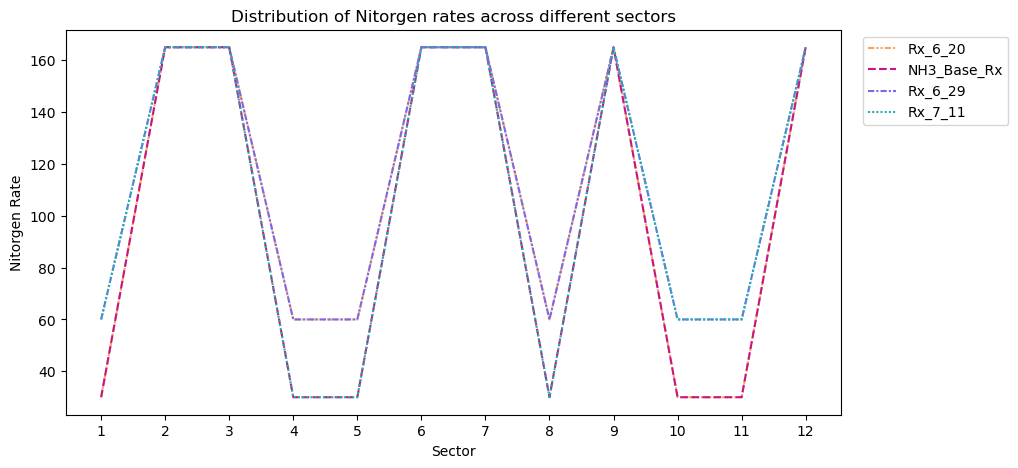

In [11]:
# A line plot for all dates 
plt.figure(figsize = (10, 5))
plt.plot(sectors, CK_data['Rx_6_20'], linestyle = (0, (3, 1, 1, 1, 1, 1)), color = 'sandybrown', label = 'Rx_6_20')
plt.plot(sectors, CK_data['NH3_Base_Rx'], linestyle = 'dashed', color = 'mediumvioletred', label = 'NH3_Base_Rx')
plt.plot(sectors, CK_data['Rx_6_29'], linestyle = (0, (3, 1, 1, 1)), color = 'mediumslateblue', label = 'Rx_6_29')
plt.plot(sectors, CK_data['Rx_7_11'], linestyle =(0, (1, 1)), color = 'lightseagreen', label = 'Rx_7_11')
plt.legend(bbox_to_anchor=(1.225, 1), loc = 1)
plt.xlabel("Sector")
plt.ylabel("Nitorgen Rate")
plt.title("Distribution of Nitorgen rates across different sectors")
plt.xticks(sectors)


plt.savefig("figures/Ditribution_of_nitrogen_all.png", bbox_inches='tight')

plt.show()

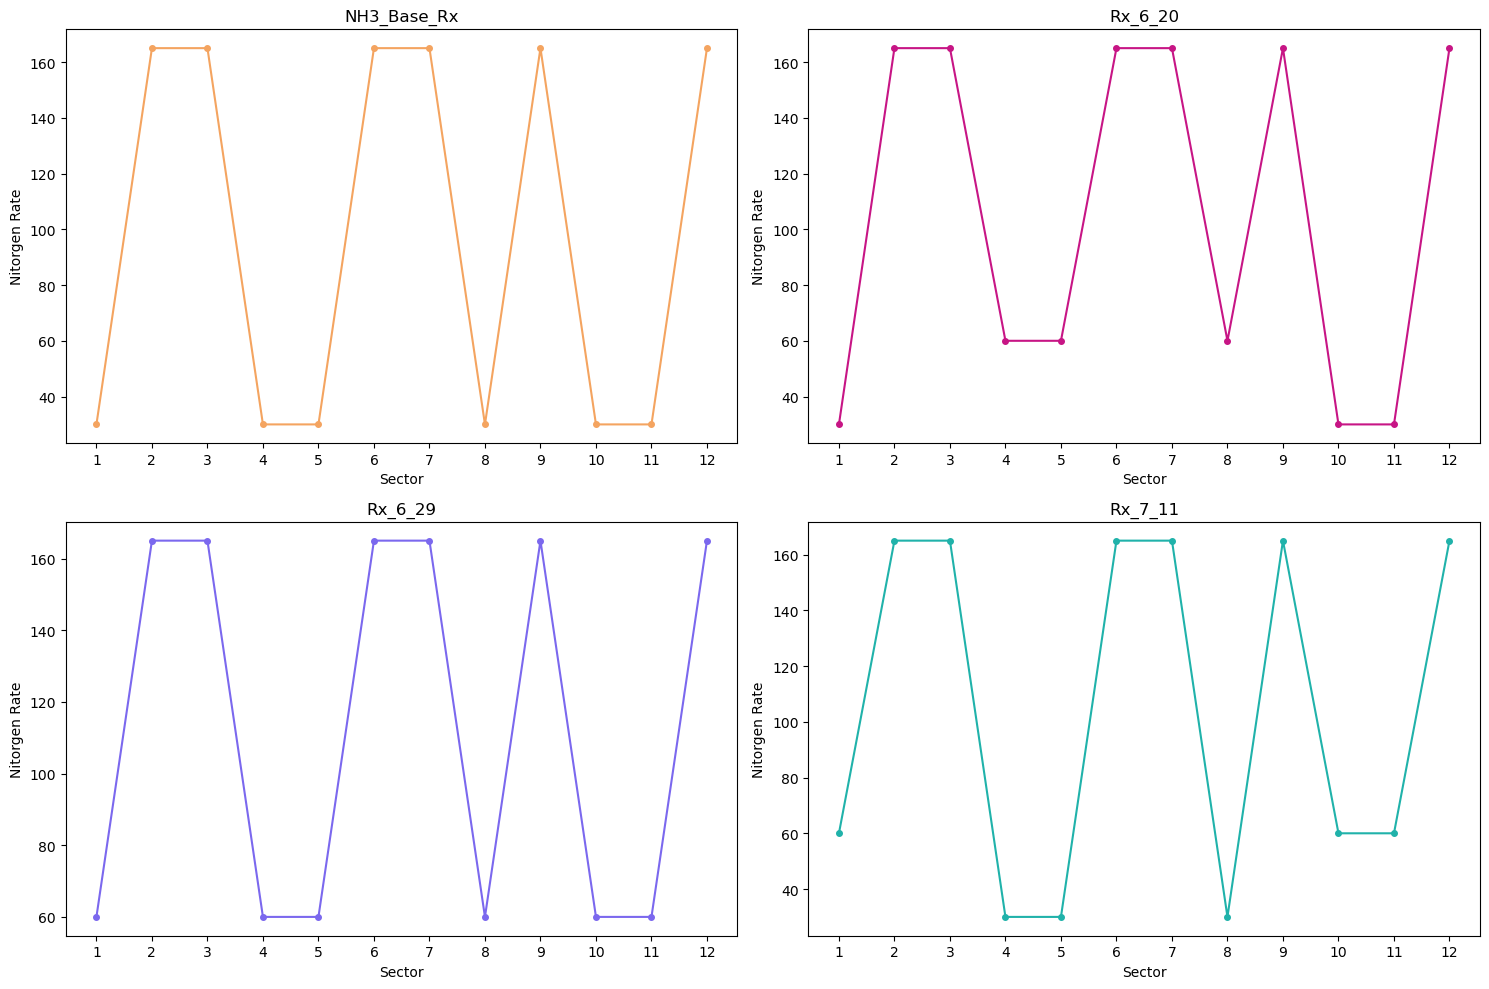

In [12]:
# This plot is too crowded? Maybe create different subplots for different dates?
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(sectors, CK_data['NH3_Base_Rx'], marker = 'o', markersize = 4, color = 'sandybrown')
axs[0, 0].set_title('NH3_Base_Rx')
axs[0, 1].plot(sectors, CK_data['Rx_6_20'], marker = 'o', markersize = 4, color = 'mediumvioletred')
axs[0, 1].set_title('Rx_6_20')
axs[1, 0].plot(sectors, CK_data['Rx_6_29'], marker = 'o', markersize = 4, color = 'mediumslateblue')
axs[1, 0].set_title('Rx_6_29')
axs[1, 1].plot(sectors, CK_data['Rx_7_11'],  marker = 'o', markersize = 4, color = 'lightseagreen')
axs[1, 1].set_title('Rx_7_11')

for ax in axs.flat:
    ax.set_xticks(sectors)
    ax.set_xlabel('Sector')
    ax.set_ylabel('Nitorgen Rate')
fig.tight_layout()

plt.savefig("figures/Ditribution_of_nitrogen_individual.png")
plt.show()


Plot of SI for different days

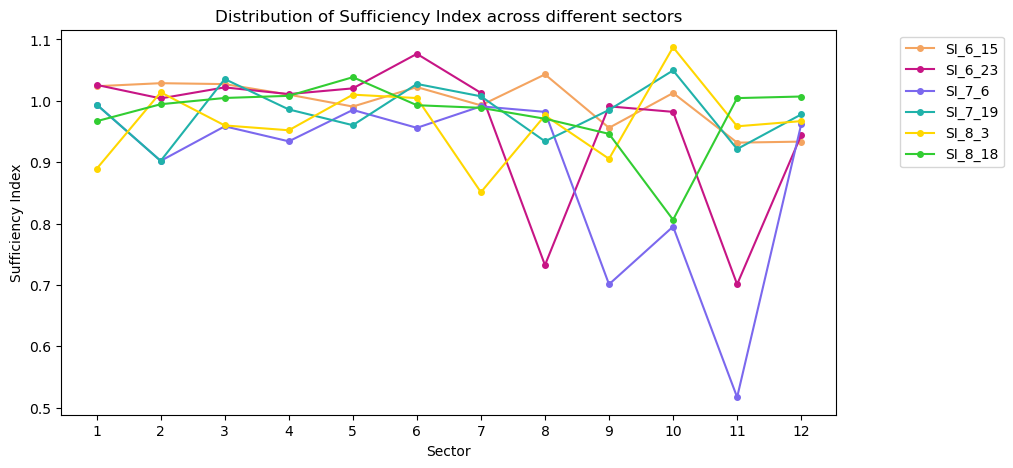

In [13]:
# A line plot for all dates 
plt.figure(figsize = (10, 5))
plt.plot(sectors, CK_data['SI_6_15'], marker = 'o', markersize = 4, color = 'sandybrown', label = 'SI_6_15')
plt.plot(sectors, CK_data['SI_6_23'], marker = 'o', markersize = 4, color = 'mediumvioletred', label = 'SI_6_23')
plt.plot(sectors, CK_data['SI_7_6'], marker = 'o', markersize = 4, color = 'mediumslateblue', label = 'SI_7_6')
plt.plot(sectors, CK_data['SI_7_19'], marker = 'o', markersize = 4, color = 'lightseagreen', label = 'SI_7_19')
plt.plot(sectors, CK_data['SI_8_3'], marker = 'o', markersize = 4, color = 'gold', label = 'SI_8_3')
plt.plot(sectors, CK_data['SI_8_18'], marker = 'o', markersize = 4, color = 'limegreen', label = 'SI_8_18')
plt.legend(bbox_to_anchor=(1.225, 1), loc = 1)
plt.xlabel("Sector")
plt.ylabel("Sufficiency Index")
plt.title("Distribution of Sufficiency Index across different sectors")
plt.xticks(sectors)


plt.savefig("figures/Ditribution_of_SI_all.png", bbox_inches='tight')

plt.show()

Plot of yield

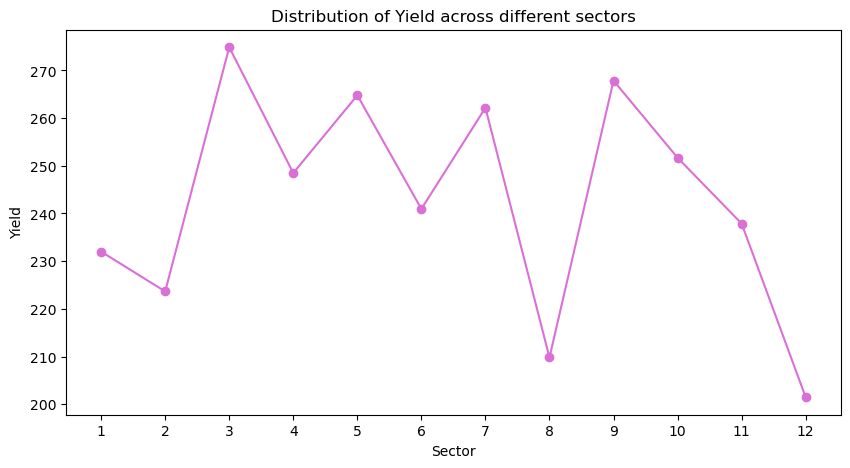

In [14]:
# A line plot for all dates 
plt.figure(figsize = (10, 5))
plt.plot(CK_data['SECTOR'], CK_data['Yield'],  marker = 'o', color = 'orchid')
plt.xlabel("Sector")
plt.ylabel("Yield")
plt.title("Distribution of Yield across different sectors")
plt.xticks(sectors)


plt.savefig("figures/Ditribution_of_yield.png", bbox_inches='tight')

plt.show()

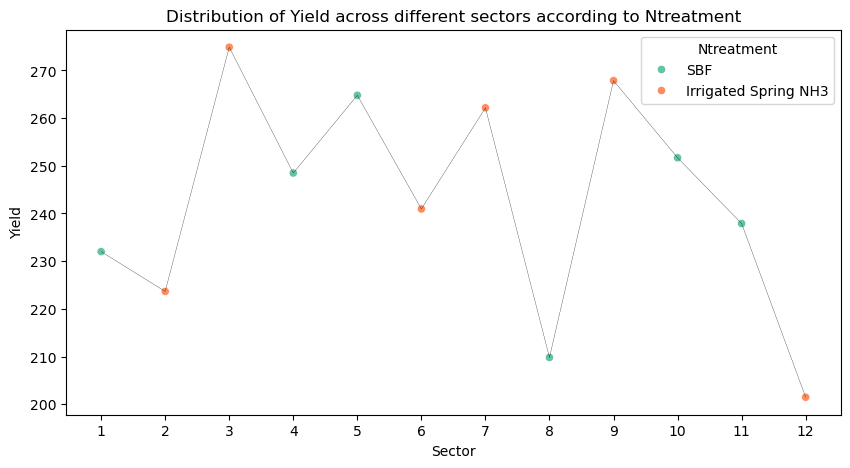

In [15]:
# same plot use different colors for different Ntreatments?
plt.figure(figsize = (10, 5))
plt.plot(CK_data['SECTOR'], CK_data['Yield'], color = 'black', linewidth = 0.2)
sns.scatterplot(data = CK_data, x = 'SECTOR', y = 'Yield',  hue = 'Ntreatment', palette = 'Set2')
plt.xlabel("Sector")
plt.ylabel("Yield")
plt.title("Distribution of Yield across different sectors according to Ntreatment")
plt.xticks(sectors)


plt.savefig("figures/Ditribution_of_yield_for_Ntreatment.png", bbox_inches='tight')

plt.show()

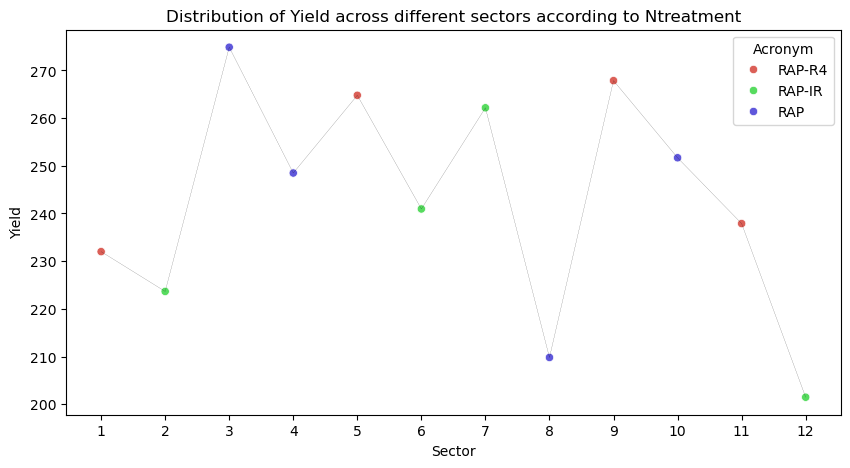

In [16]:
# same plot use different colors for different Acronym - this is also a treatment, this is supposed to be related to the Ntrt, but not sure how
plt.figure(figsize = (10, 5))
plt.plot(CK_data['SECTOR'], CK_data['Yield'], color = 'black', linewidth = 0.1)
sns.scatterplot(data = CK_data, x = 'SECTOR', y = 'Yield',  hue = 'Acronym', palette = 'hls')
plt.xlabel("Sector")
plt.ylabel("Yield")
plt.title("Distribution of Yield across different sectors according to Ntreatment")
plt.xticks(sectors)


plt.savefig("figures/Ditribution_of_yield_for_Acronym.png", bbox_inches='tight')

plt.show()

New plot additions

1. Average yields for different Ntrts

In [17]:
# why_1_mean = (CK_data['Ntreatment'] == 'Irrigated Spring NH3')
# why_2_mean = (CK_data['Ntreatment'] == 'SBF')

In [18]:
# print(CK_data[why_1_mean]['Yield'].mean(), CK_data[why_1_mean]['Yield'].std())
# print(CK_data[why_2_mean]['Yield'].mean(), CK_data[why_2_mean]['Yield'].std())

In [19]:
mean_vals_Ntrt = CK_data.groupby(["Ntreatment"]).agg({"Yield": "mean"})
sd_vals_Ntrt = CK_data.groupby(["Ntreatment"]).agg({"Yield": "std"})

In [20]:
mean_vals_Ntrt.values, sd_vals_Ntrt.values

(array([[245.1635    ],
        [240.77703333]]),
 array([[28.55653152],
        [18.97365756]]))

In [21]:
mean_vals_Ntrt

,Yield
Ntreatment,
Irrigated Spring NH3,245.163500
SBF,240.777033


In [22]:
sd_vals_Ntrt

,Yield
Ntreatment,
Irrigated Spring NH3,28.556532
SBF,18.973658


In [23]:
N_trts = ['Irrigated Spring NH3', 'SBF']

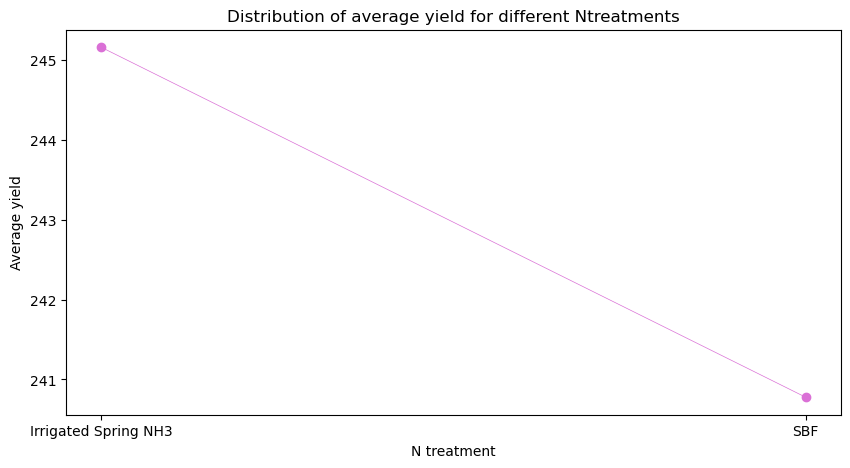

In [24]:
plt.figure(figsize = (10, 5))
plt.plot(N_trts, mean_vals_Ntrt.values, marker = 'o', linewidth = 0.5, color = 'orchid')
# yerr = [[28.5565, 28.5565], # 'down' error
#         [18.9736, 18.9736]]  
# plt.errorbar(N_trts, mean_vals_Ntrt.values , yerr =yerr, fmt="r-o", ecolor = "black")
plt.xlabel("N treatment")
plt.ylabel("Average yield")
plt.title("Distribution of average yield for different Ntreatments")

plt.savefig("figures/Average_yield_Ntreatment.png")

plt.show()

2. Average yields for different Acronyms

In [25]:
mean_vals_Acr = CK_data.groupby(["Acronym"]).agg({"Yield": "mean"})
sd_vals_Acr = CK_data.groupby(["Acronym"]).agg({"Yield": "std"})

In [26]:
mean_vals_Acr.values, sd_vals_Acr.values

(array([[246.21375],
        [232.06025],
        [250.6368 ]]),
 array([[26.97098053],
        [25.77129867],
        [18.32139675]]))

In [27]:
mean_vals_Acr

,Yield
Acronym,
RAP,246.21375
RAP-IR,232.06025
RAP-R4,250.63680


In [28]:
sd_vals_Acr

,Yield
Acronym,
RAP,26.970981
RAP-IR,25.771299
RAP-R4,18.321397


In [29]:
Acro = ['RAP', 'RAP-IR', 'RAP-R4']

In [30]:
sd_vals_Acr.values.ravel()

array([26.97098053, 25.77129867, 18.32139675])

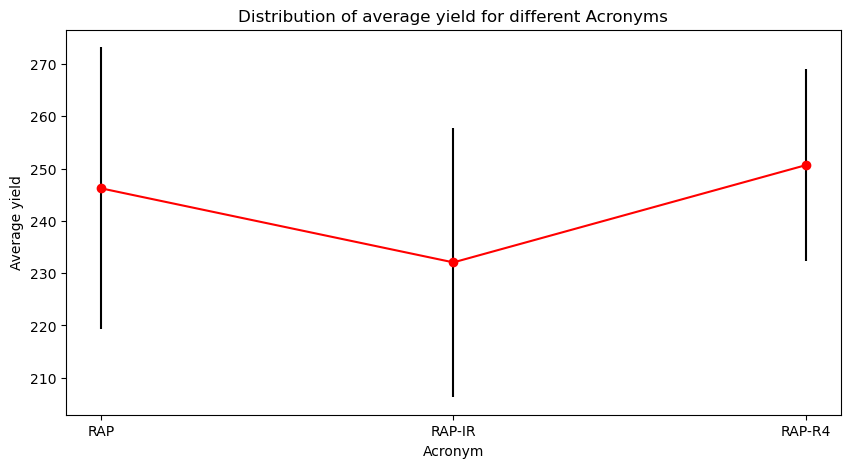

In [31]:
plt.figure(figsize = (10, 5))
# plt.plot(Acro, mean_vals_Acr.values, marker = 'o', linewidth = 0.5, color = 'salmon')
# yerr = [[28.5565, 28.5565], # 'down' error
#         [18.9736, 18.9736]]  
plt.errorbar(Acro, mean_vals_Acr.values.ravel() , yerr =sd_vals_Acr.values.ravel(), fmt="r-o", ecolor = "black")
plt.xlabel("Acronym")
plt.ylabel("Average yield")
plt.title("Distribution of average yield for different Acronyms")

plt.savefig("figures/Average_yield_Acro_with_error_bars.png")

plt.show()

3. scatter plot for target vs applied N rate

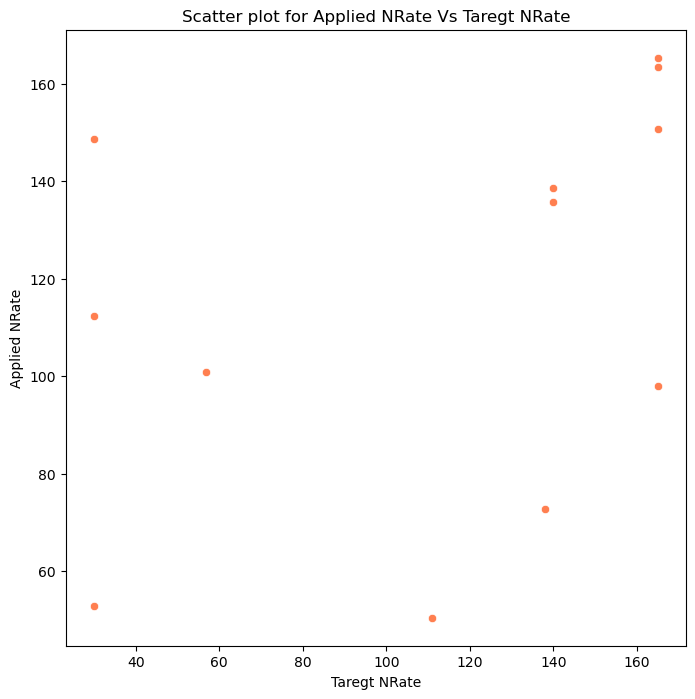

In [32]:
plt.figure(figsize = (8, 8))
# sns.scatterplot(data = CK_data, x = 'SECTOR', y = 'Yield',  hue = 'Acronym', palette = 'hls')
sns.scatterplot(data = CK_data, x = 'Target_NRate', y = 'Applied_NRate', color = 'coral')
plt.xlabel("Taregt NRate")
plt.ylabel("Applied NRate")
plt.title("Scatter plot for Applied NRate Vs Taregt NRate")
plt.savefig("figures/Scatter_plot_TargetN_vs_AppliedN.png")
plt.show()

looks slightly positive, but a lot of scatter in the data

In [33]:
# exact value of this correlation
pearsonr(CK_data['Applied_NRate'], CK_data['Target_NRate'])

PearsonRResult(statistic=0.37434735490478094, pvalue=0.23058681035201745)

4. scatter plot for yield vs applied N rate

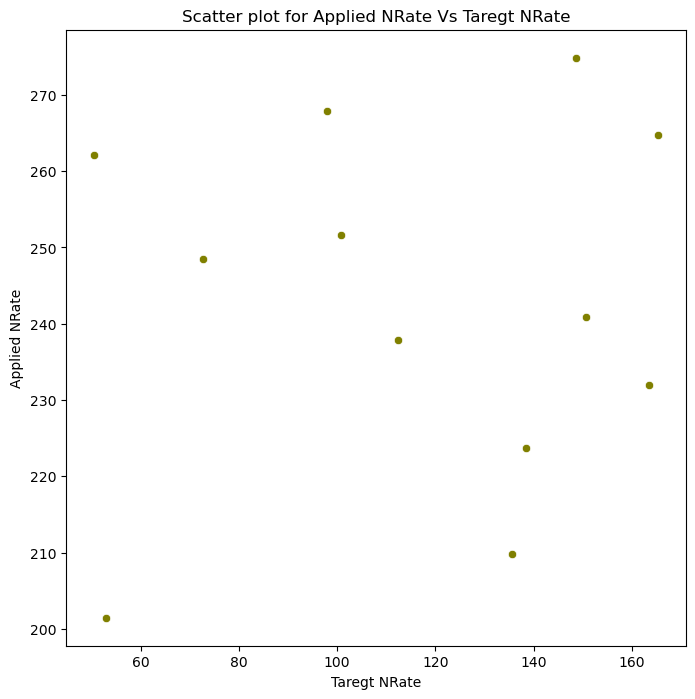

In [34]:
plt.figure(figsize = (8, 8))
# sns.scatterplot(data = CK_data, x = 'SECTOR', y = 'Yield',  hue = 'Acronym', palette = 'hls')
sns.scatterplot(data = CK_data, x = 'Applied_NRate', y = 'Yield', color = 'olive')
plt.xlabel("Taregt NRate")
plt.ylabel("Applied NRate")
plt.title("Scatter plot for Applied NRate Vs Taregt NRate")
plt.savefig("figures/Scatter_plot_Yield_vs_AppliedN.png")
plt.show()

In [35]:
# looks slightly positive, does not look how we might like it to be!

In [36]:
# exact value of this correlation
pearsonr(CK_data['Applied_NRate'], CK_data['Yield'])

PearsonRResult(statistic=0.09506705818927644, pvalue=0.7688423018867736)

In [37]:
# look into some plots on SI, avg SI variation per the given dates next
# Writing a function is straightforward, and let us help keep the codes clean

In [38]:
# Let's do the function

def averages_comparison_with_error_bars(category, variable, color_format):
    # get the mean and the standard deviation for the variable category-wise for the category variable
    mean_for_variable = CK_data.groupby([category]).agg({variable: "mean"})
    sd_for_variable = CK_data.groupby([category]).agg({variable: "std"})

    # Get the categories of the categorical variable
    x_vals = list(mean_for_variable.index)


    # create the plot
    # plot size
    plt.figure(figsize = (10, 5))
    # add error bars to the means
    plt.errorbar(x_vals, mean_for_variable.values.ravel() , yerr =sd_for_variable.values.ravel(), fmt = color_format, ecolor = "black")
    # label x axis
    plt.xlabel("Acronym")
    # label y axis
    plt.ylabel("Average SI")
    # title the plot
    if len(variable.split("_")[-1]) == 2:
        var_name = variable[-4:]
    else:
        var_name = variable[-3:]
    title = "Distribution of average SI for different " +  category + 's ' + var_name
    # add the title
    plt.title(title)
    # show the plot
    plt.show()   

5. SI_6_15 per acro

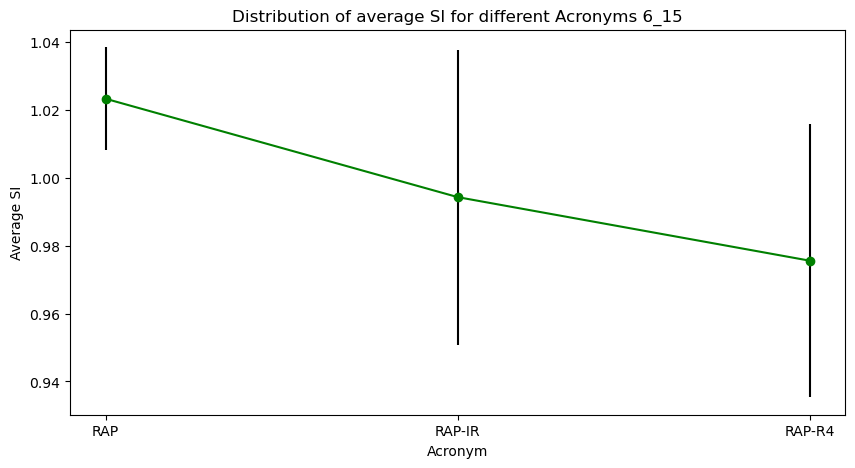

In [39]:
averages_comparison_with_error_bars("Acronym", "SI_6_15", 'g-o')

6. SI_6_23 per acro

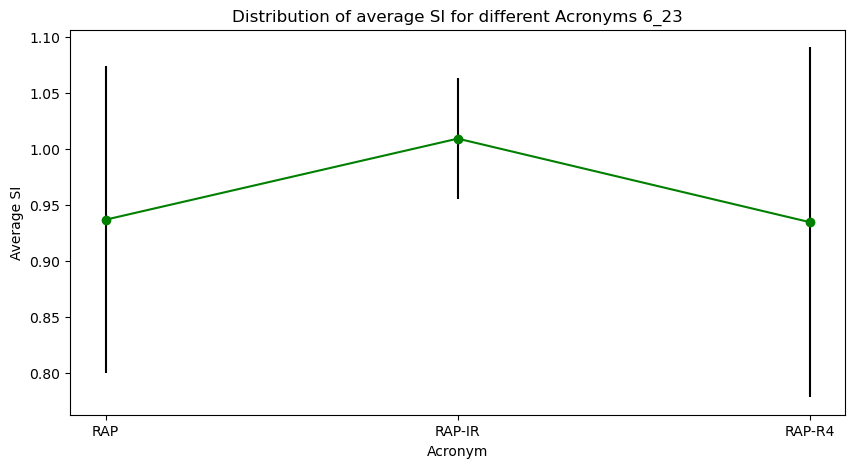

In [40]:
averages_comparison_with_error_bars("Acronym", "SI_6_23", 'g-o')

7. SI_7_6 per acro

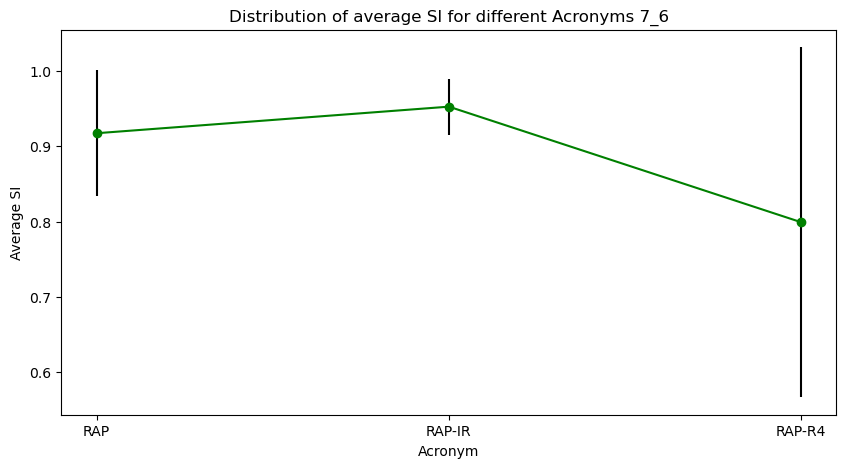

In [41]:
averages_comparison_with_error_bars("Acronym", "SI_7_6", 'g-o')

8. SI_7_19 per acro

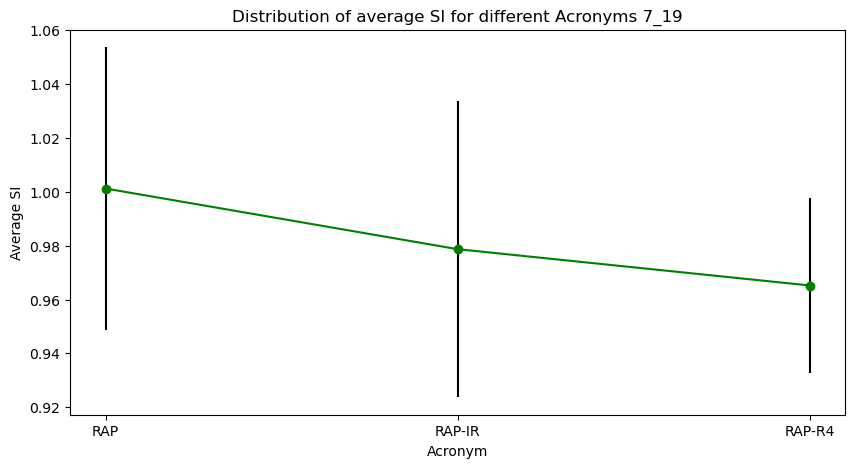

In [42]:
averages_comparison_with_error_bars("Acronym", "SI_7_19", 'g-o')

9. SI_08_03 per acro

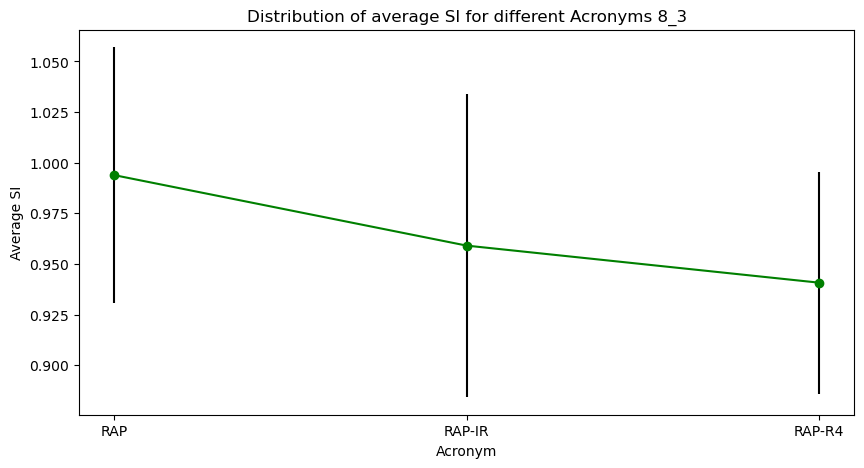

In [43]:
averages_comparison_with_error_bars("Acronym", "SI_8_3", 'g-o')

10. SI_8_18 per acro

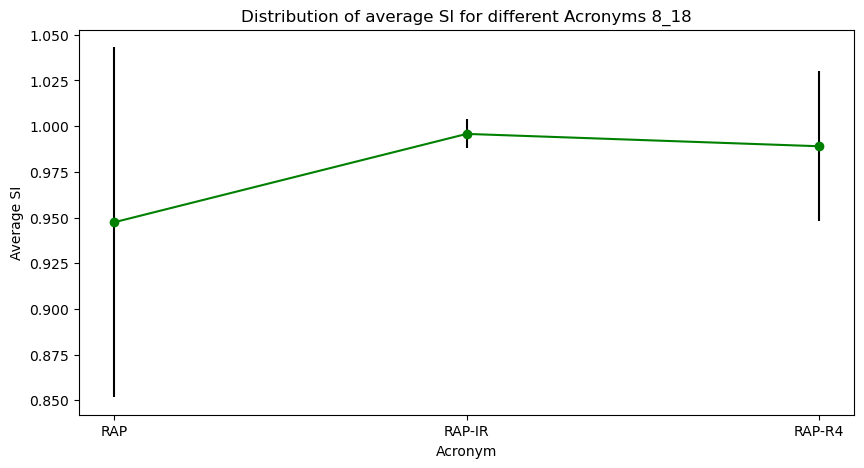

In [44]:
averages_comparison_with_error_bars("Acronym", "SI_8_18", 'g-o')

In [45]:
# Do a similar comparison for the Ntreatment categories

11. SI_08_03 per Ntreatment

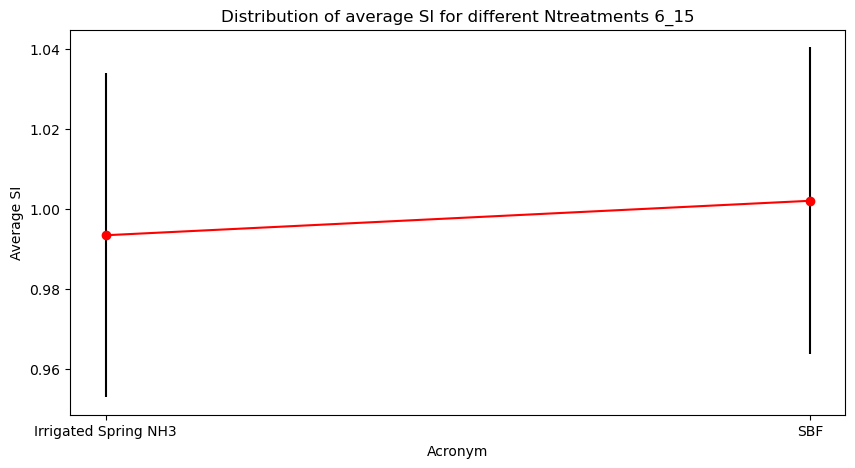

In [46]:
averages_comparison_with_error_bars("Ntreatment", "SI_6_15", 'r-o')

12. SI_6_23 per Ntreatment

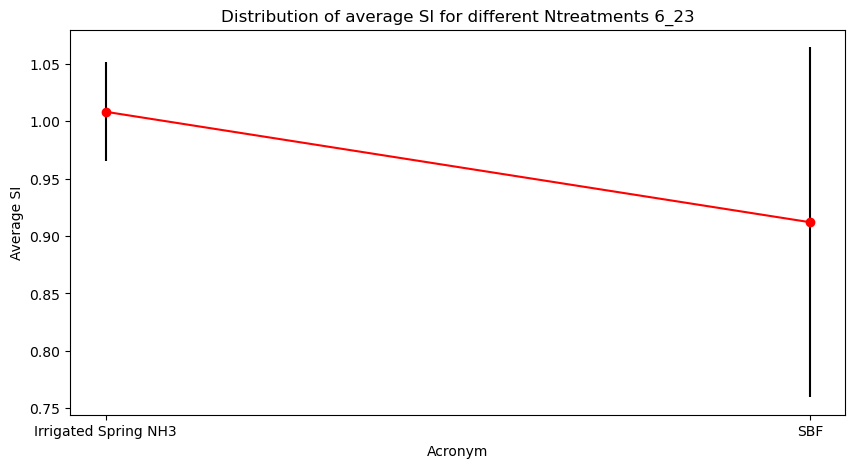

In [47]:
averages_comparison_with_error_bars("Ntreatment", "SI_6_23", 'r-o')

13. SI_7_6 per Ntreatment

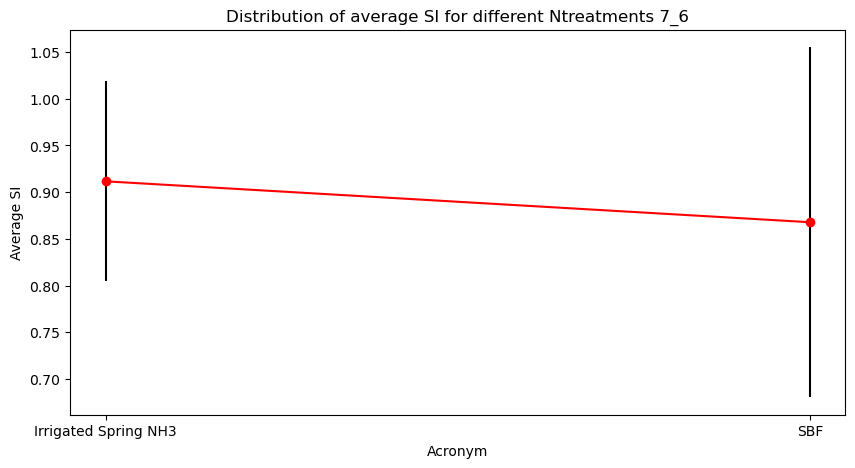

In [48]:
averages_comparison_with_error_bars("Ntreatment", "SI_7_6", 'r-o')

14. SI_7_19 per Ntreatment

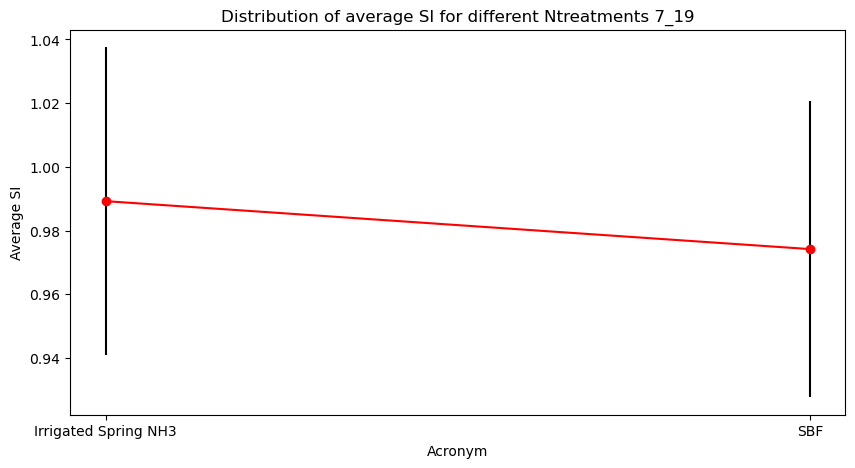

In [49]:
averages_comparison_with_error_bars("Ntreatment", "SI_7_19", 'r-o')

15. SI_08_03 per Ntreatment

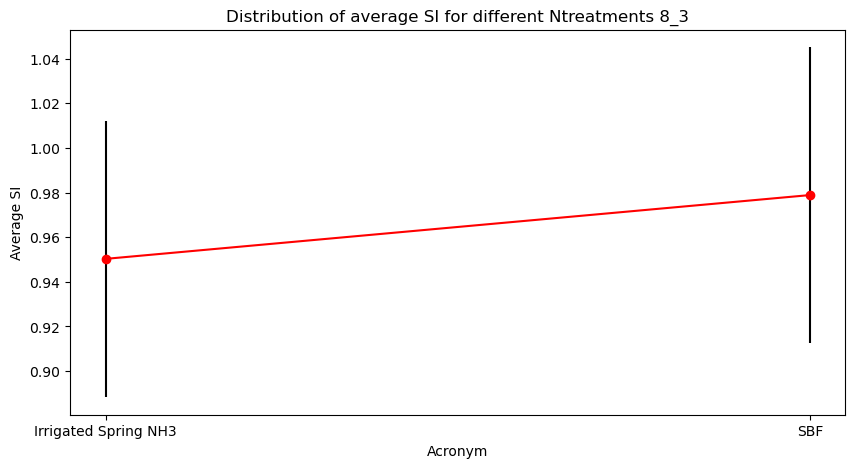

In [50]:
averages_comparison_with_error_bars("Ntreatment", "SI_8_3", 'r-o')

16. SI_8_18 per Ntreatment

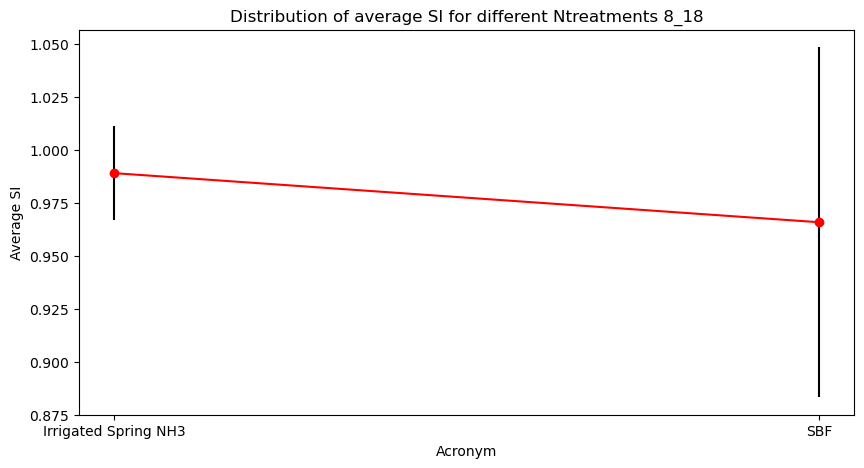

In [51]:
averages_comparison_with_error_bars("Ntreatment", "SI_8_18", 'r-o')

In [52]:
# Does it make sense to compare the average SIs across the sectors?
# Seems it's relevant, let's do it

In [53]:
SI_averages = CK_data[['SI_6_15', 'SI_6_23',	'SI_7_6', 'SI_7_19'	, 'SI_8_3', 'SI_8_18']].mean(axis=1)

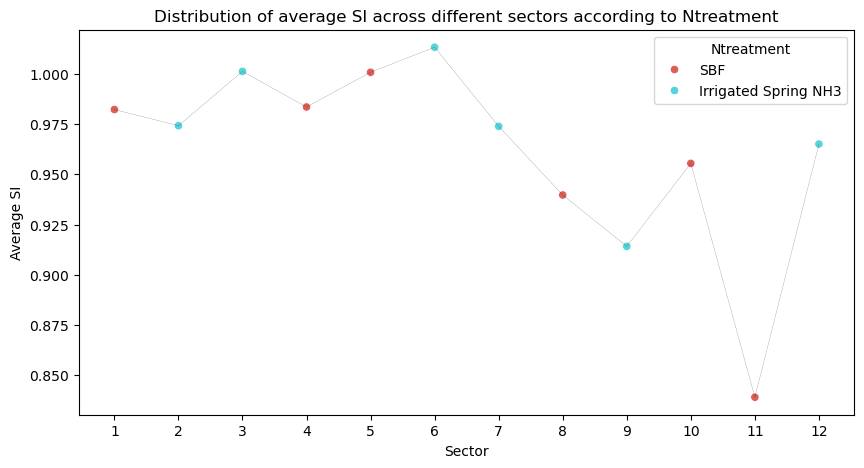

In [54]:
# plot these values according to the Ntreatment category
plt.figure(figsize = (10, 5))
plt.plot(CK_data['SECTOR'], SI_averages, color = 'black', linewidth = 0.1)
sns.scatterplot(x = CK_data['SECTOR'], y = SI_averages,  hue = CK_data['Ntreatment'], palette = 'hls')
plt.xlabel("Sector")
plt.ylabel("Average SI")
plt.title("Distribution of average SI across different sectors according to Ntreatment")
plt.xticks(CK_data['SECTOR'])

plt.show()

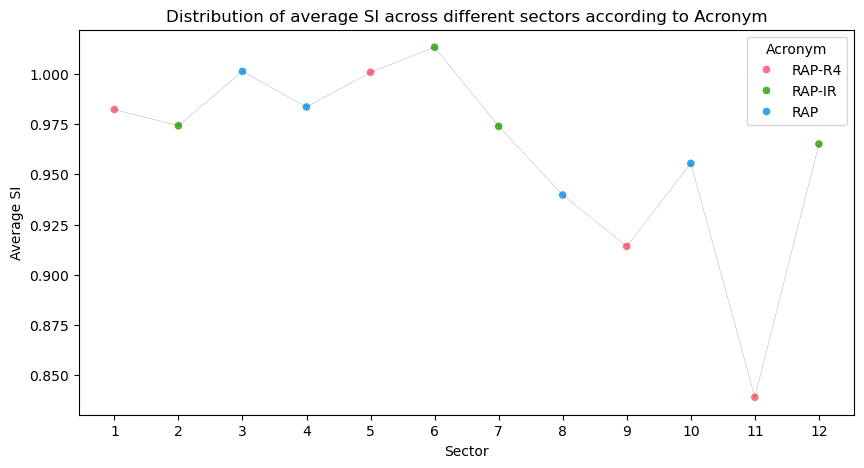

In [55]:
# plot these values according to the Acronym category
plt.figure(figsize = (10, 5))
plt.plot(CK_data['SECTOR'], SI_averages, color = 'black', linewidth = 0.1)
sns.scatterplot(x = CK_data['SECTOR'], y = SI_averages,  hue = CK_data['Acronym'], palette = 'husl')
plt.xlabel("Sector")
plt.ylabel("Average SI")
plt.title("Distribution of average SI across different sectors according to Acronym")
plt.xticks(CK_data['SECTOR'])

plt.show()

In [56]:
# Does it make sense to compare the average NH3s across the sectors?
# Seems it's relevant, let's do it

In [57]:
CK_data.head()

,SECTOR,Rep,Acronym,Ntreatment,NH3_Base_Rx,Rx_6_20,Rx_6_29,Rx_7_11,Obj__Id,Target_NRate,Applied_NRate,SI_6_15,SI_6_23,SI_7_6,SI_7_19,SI_8_3,SI_8_18,Yield
0,1,1,RAP-R4,SBF,30,30,60,60,587,165.0003,163.4566,1.023816,1.026000,0.993957,0.993957,0.889168,0.966771,232.0022
1,2,1,RAP-IR,Irrigated Spring NH3,165,165,165,165,561,140.0013,138.4943,1.028762,1.003950,0.902090,0.902090,1.013855,0.994462,223.6540
2,3,1,RAP,Irrigated Spring NH3,165,165,165,165,779,30.0041,148.5456,1.027272,1.021914,0.958456,1.035477,0.959885,1.004655,274.8740
3,4,2,RAP,SBF,30,60,60,30,781,138.0010,72.7658,1.010141,1.010998,0.933970,0.985974,0.951999,1.008160,248.4900
4,5,2,RAP-R4,SBF,30,60,60,30,368,165.0003,165.2911,0.990665,1.020321,0.985180,0.960276,1.010058,1.038533,264.7920


In [58]:
avg_NH3 = CK_data[['NH3_Base_Rx', 'Rx_6_20', 'Rx_6_29', 'Rx_7_11']].mean(axis = 1)

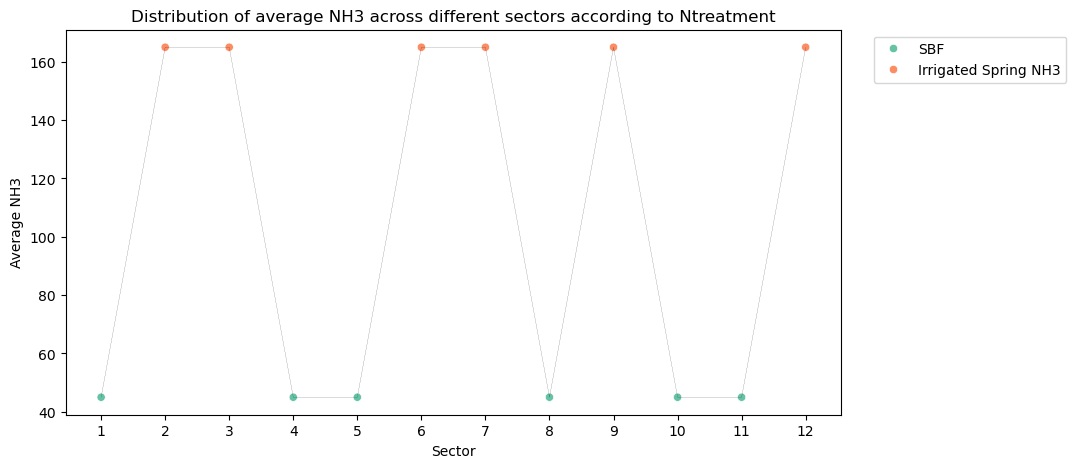

In [59]:
# plot these values according to the Ntreatment category
plt.figure(figsize = (10, 5))
plt.plot(CK_data['SECTOR'], avg_NH3, color = 'black', linewidth = 0.1)
sns.scatterplot(x = CK_data['SECTOR'], y = avg_NH3,  hue = CK_data['Ntreatment'], palette = 'Set2')
plt.xlabel("Sector")
plt.ylabel("Average NH3")
plt.title("Distribution of average NH3 across different sectors according to Ntreatment")
plt.xticks(CK_data['SECTOR'])
plt.legend(bbox_to_anchor=(1.3, 1), loc = 1)

plt.show()

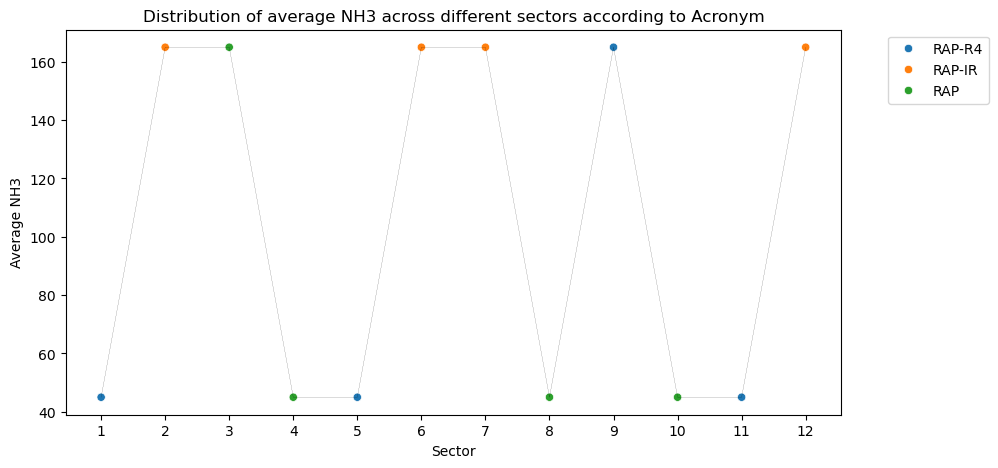

In [60]:
# plot these values according to the acronym category
plt.figure(figsize = (10, 5))
plt.plot(CK_data['SECTOR'], avg_NH3, color = 'black', linewidth = 0.1)
sns.scatterplot(x = CK_data['SECTOR'], y = avg_NH3,  hue = CK_data['Acronym'])
plt.xlabel("Sector")
plt.ylabel("Average NH3")
plt.title("Distribution of average NH3 across different sectors according to Acronym")
plt.xticks(CK_data['SECTOR'])
plt.legend(bbox_to_anchor=(1.2, 1), loc = 1)

plt.show()